<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_class_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for classification with multiple models

Load libraries

In [1]:
!pip install catboost

     |████████████████████████████████| 64.4MB 57kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [4]:
#30 features
dataset['data'].shape

(569, 30)

In [5]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

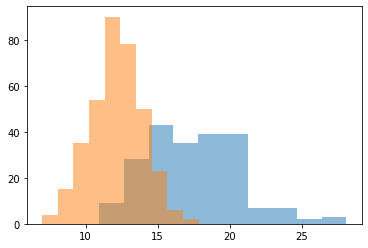

In [8]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [11]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


In [0]:
df = pd.DataFrame(data=X_train, columns=dataset.feature_names)

In [0]:
df['target'] = y_train

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.680,16.17,75.49,420.5,0.11280,0.09263,0.042790,0.03132,0.1853,0.06401,0.3713,1.1540,2.554,27.57,0.008998,0.012920,0.018510,0.011670,0.02152,0.003213,13.32,21.59,86.57,549.8,0.1526,0.1477,0.14900,0.09815,0.2804,0.08024,1
1,10.510,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.03068,0.1922,0.07782,0.3336,1.8600,2.041,19.91,0.011880,0.037470,0.045910,0.015440,0.02287,0.006792,11.16,22.75,72.62,374.4,0.1300,0.2049,0.12950,0.06136,0.2383,0.09026,1
2,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,0.2865,1.6780,1.968,18.99,0.006908,0.009442,0.006972,0.006159,0.02694,0.002060,12.36,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123,1
3,9.465,21.01,60.11,269.4,0.10440,0.07773,0.021720,0.01504,0.1717,0.06899,0.2351,2.0110,1.660,14.20,0.010520,0.017550,0.017140,0.009333,0.02279,0.004237,10.41,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211,1
4,12.900,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.03088,0.1778,0.06235,0.2143,0.7712,1.689,16.64,0.005324,0.015630,0.015100,0.007584,0.02104,0.001887,14.48,21.82,97.17,643.8,0.1312,0.2548,0.20900,0.10120,0.3549,0.08118,1


In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.076927,19.401231,91.696703,651.845714,0.096607,0.105488,0.090465,0.049364,0.181400,0.063056,0.409943,1.239679,2.914299,40.982738,0.007150,0.026098,0.033076,0.012058,0.020798,0.003908,16.183332,25.703407,106.842066,874.673846,0.132302,0.255009,0.273997,0.115001,0.288799,0.084117,0.635165
std,3.582352,4.385575,24.750328,358.998049,0.013978,0.053839,0.081472,0.039248,0.027537,0.007167,0.291471,0.582157,2.136038,48.626673,0.003099,0.018698,0.032411,0.006477,0.008346,0.002830,4.914311,6.227363,34.276565,582.879103,0.022510,0.161568,0.212719,0.066661,0.061609,0.018381,0.481914
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.650000,16.175000,74.720000,415.650000,0.086610,0.064880,0.029620,0.020290,0.163500,0.058270,0.236650,0.832400,1.668500,17.885000,0.005286,0.013115,0.015140,0.007975,0.015095,0.002269,12.980000,21.090000,83.875000,512.800000,0.117150,0.145850,0.112100,0.064985,0.250300,0.071895,0.000000
50%,13.160000,18.750000,85.420000,534.600000,0.096760,0.095460,0.063870,0.034850,0.179200,0.061680,0.324200,1.108000,2.279000,24.600000,0.006432,0.020750,0.026260,0.011100,0.018980,0.003249,14.800000,25.220000,97.110000,670.000000,0.131600,0.211900,0.224100,0.099930,0.281900,0.079990,1.000000
75%,15.815000,21.840000,103.700000,785.600000,0.105350,0.130500,0.132200,0.074095,0.195700,0.066135,0.473500,1.497500,3.306500,44.935000,0.008199,0.033315,0.043280,0.014990,0.023765,0.004587,18.800000,29.545000,125.650000,1086.000000,0.145800,0.339500,0.388400,0.164800,0.317150,0.092100,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ecc11898>,
      dtype=object)

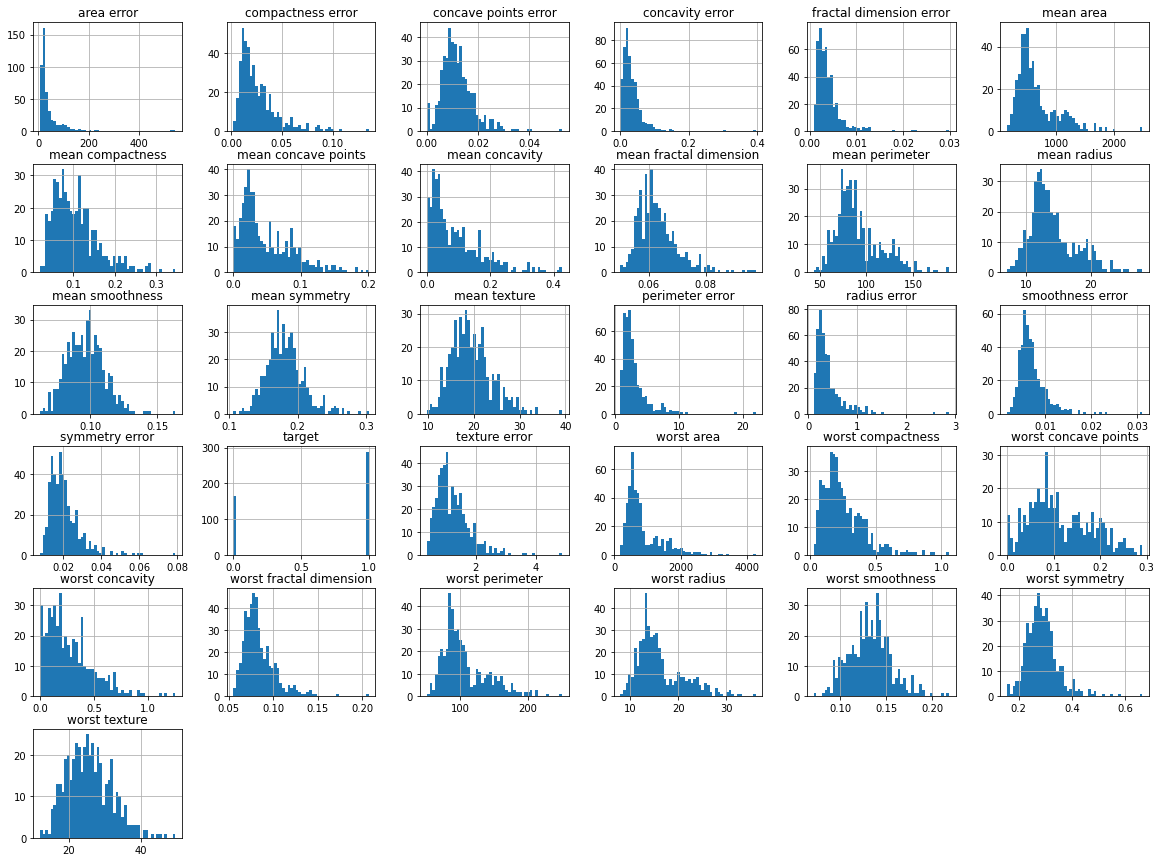

In [16]:
# show data
df.hist(bins=50, figsize=(20,15))

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [18]:
corr_mx['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.076110
mean fractal dimension     0.037813
symmetry error             0.020331
texture error              0.018808
fractal dimension error   -0.049510
concavity error           -0.232226
compactness error         -0.280710
worst fractal dimension   -0.304591
mean symmetry             -0.311413
mean smoothness           -0.343986
concave points error      -0.394662
worst symmetry            -0.400896
mean texture              -0.406503
worst smoothness          -0.410533
worst texture             -0.450968
area error                -0.533731
perimeter error           -0.545547
radius error              -0.550439
worst compactness         -0.586408
mean compactness          -0.588127
worst concavity           -0.655511
mean concavity            -0.689563
mean area                 -0.713589
worst area                -0.731473
mean radius               -0.733919
mean perimeter            -0.745946
worst radius              -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98eb89b9e8>,
      dtype=object)

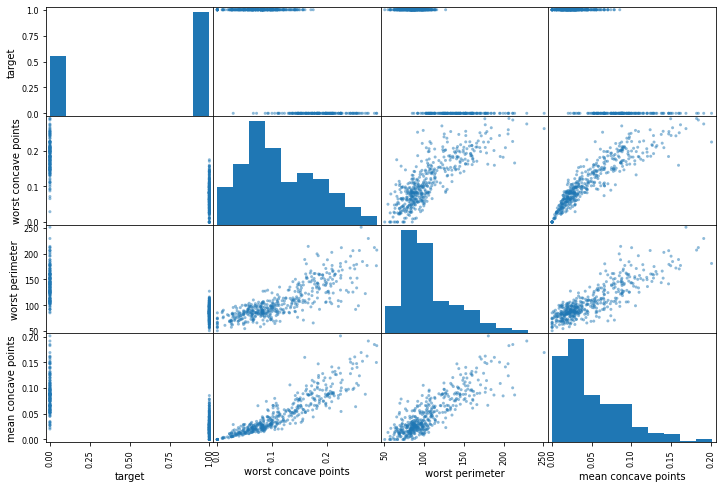

In [19]:
attributes = ['target', 'worst concave points', 'worst perimeter', 'mean concave points']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

In [0]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

###Train model

In [0]:
models = {'decision tree' : DecisionTreeClassifier(),
                'random forest' : RandomForestClassifier(),
                'extra trees' : ExtraTreesClassifier(),
                'gradient boosting' : GradientBoostingClassifier(),
                'xgboost' : XGBClassifier(),
                'catboost' : CatBoostClassifier(verbose=False)}

In [0]:
for key in models:
  models[key].fit(X_train_processed, y_train)

###Evaluation

k-th cross validation

In [0]:
def kth_cross_validation(model):
   #k-th cross validation
   cv = 3 #the number of foldings
   scores = cross_val_score(model, X_train_processed, y_train, cv=cv, scoring='accuracy')
   return scores

In [24]:
for key in models:
  scores = kth_cross_validation(models[key])
  print(key, scores.mean())

decision tree 0.909869873358894
random forest 0.9538892761705587
extra trees 0.9626757290577438
gradient boosting 0.9428807947019867
xgboost 0.9450883002207506
catboost 0.9604827466016034


various scores

In [25]:
for key in models:
   y_train_pred = cross_val_predict(models[key], X_train_processed, y_train, cv=3)
   print(key, classification_report(y_train, y_train_pred))

decision tree               precision    recall  f1-score   support

           0       0.88      0.92      0.90       166
           1       0.95      0.93      0.94       289

    accuracy                           0.92       455
   macro avg       0.91      0.92      0.92       455
weighted avg       0.92      0.92      0.92       455

random forest               precision    recall  f1-score   support

           0       0.96      0.92      0.94       166
           1       0.95      0.98      0.97       289

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455

extra trees               precision    recall  f1-score   support

           0       0.96      0.94      0.95       166
           1       0.97      0.98      0.97       289

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96 

In [0]:
def plot_pr_curve(y, y_score, label=None):

    fpr, tpr, thresholds = precision_recall_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    return

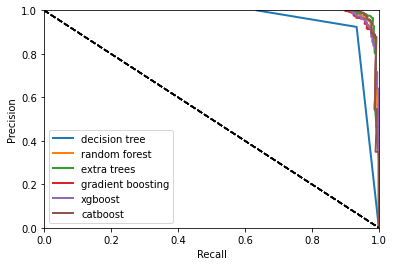

In [27]:
for key in models:
   y_train_probas = cross_val_predict(models[key], X_train_processed, y_train, cv=3, method='predict_proba')
   y_train_scores = y_train_probas[:, 1]
   plot_pr_curve(y_train, y_train_scores, label=key)

In [0]:
def plot_roc_curve(y, y_score, label=None):

    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    return

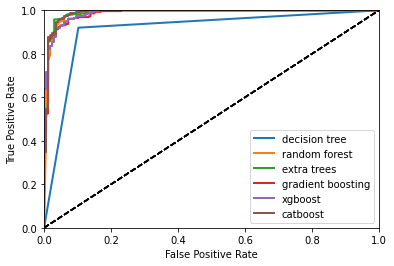

In [29]:
for key in models:
   y_train_probas = cross_val_predict(models[key], X_train_processed, y_train, cv=3, method='predict_proba')
   y_train_scores = y_train_probas[:, 1]
   plot_roc_curve(y_train, y_train_scores, label=key)

In [30]:
for key in models:
   y_train_probas = cross_val_predict(models[key], X_train_processed, y_train, cv=3, method='predict_proba')
   y_train_scores = y_train_probas[:, 1]
   auc_score = roc_auc_score(y_train, y_train_scores)
   print(key, auc_score)

decision tree 0.9120148413724101
random forest 0.9892545962396299
extra trees 0.9914120148413724
gradient boosting 0.9850960937174302
xgboost 0.9879518072289155
catboost 0.9887022136990871


###Test

In [31]:
for key in models:
  result = models[key].score(scaler.transform(X_test), y_test)
  print(key, result)

decision tree 0.9122807017543859
random forest 0.9649122807017544
extra trees 0.956140350877193
gradient boosting 0.9736842105263158
xgboost 0.9824561403508771
catboost 0.9824561403508771
